>__Exercise 3: Law of large numbers__.
>
> 1. Sample __N=10,000__ data points from a [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution) with parameters $\mu = 0 $ and $\sigma = 4$, using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function. Store your data in a numpy array $\mathbf{X}$.
> 2. Create a figure.
>    - Plot the distribution of the data in $\mathbf{X}$.
> 3. Compute the cumulative average of $\mathbf{X}$ (you achieve this by computing $average(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$  ). Store the result in an array.
> 4. In a similar way, compute the cumulative standard error of $\mathbf{X}$. __Note__: the standard error of a sample is defined as $ \sigma_{M} = \frac{\sigma}{\sqrt(n)} $, where $\sigma$ is the sample standard deviation and $n$ is the sample size. Store the result in an array.
> 5. Compute the values of the distribution mean and median using the formulas you can find on the [Wikipedia page of the Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)
> 6. Create a figure.
>     - Plot the cumulative average computed in point 3. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>     - Add errorbars to each point in the graph with width equal to the standard error of the mean (the one you computed in point 4).
>     - Add a horizontal line corresponding to the distribution mean (the one you found in point 5).
> 7.  Compute the cumulative median of $\mathbf{X}$ (you achieve this by computing $median(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$). Store the result in an array.
> 8. Create a figure.
>    - Plot the cumulative median computed in point 7. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>    - Add a horizontal line corresponding to the distribution median (the one you found in point 5).
>    - _Optional:_ Add errorbars to your median line graph, with width equal to the standard error of the median. You can compute the standard error of the median [via bootstrapping](https://online.stat.psu.edu/stat500/book/export/html/619).
> 9. Now sample __N = 10,000__ data points from a [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution) with parameters $x_m=1$ and $\alpha=0.5$ using the [`np.random.pareto()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html) function, and store it in a numpy array. (_Optional:_ Write yourself the function to sample from a Pareto distribution using the [_Inverse Transform Sampling method_](https://en.wikipedia.org/wiki/Inverse_transform_sampling))
> 10. Repeat points 2 to 8 for the Pareto Distribution sample computed in point 9.
> 11. Now sample __N = 10,000__ data points from a [Lognormal Distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) with parameters $\mu=0$ and $\sigma=4$ using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function, and store it in a numpy array.
> 12. Repeat points 2 to 8 for the Lognormal Distribution sample computed in point 11.
> 13. Now, consider the array collecting the citations of papers from 2009 you created in Exercise 3, point 1. First, compute the mean and median number of citations for this population. Then, extract a random sample of __N=10,000__ papers.
> 14. Repeat points 2,3,4,6,7 and 8 above for the paper citation sample prepared in point 13.
> 15. Answer the following questions (__Hint__: I suggest you plot the graphs above multiple times for different random samples, to get a better understanding of what is going on):
>    -  Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?
>    - Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases?
>    - Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications?
>    - What do you think are the main take-home message of this exercise?
>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Text(0.5, 1.0, 'Gaussian Distribution')

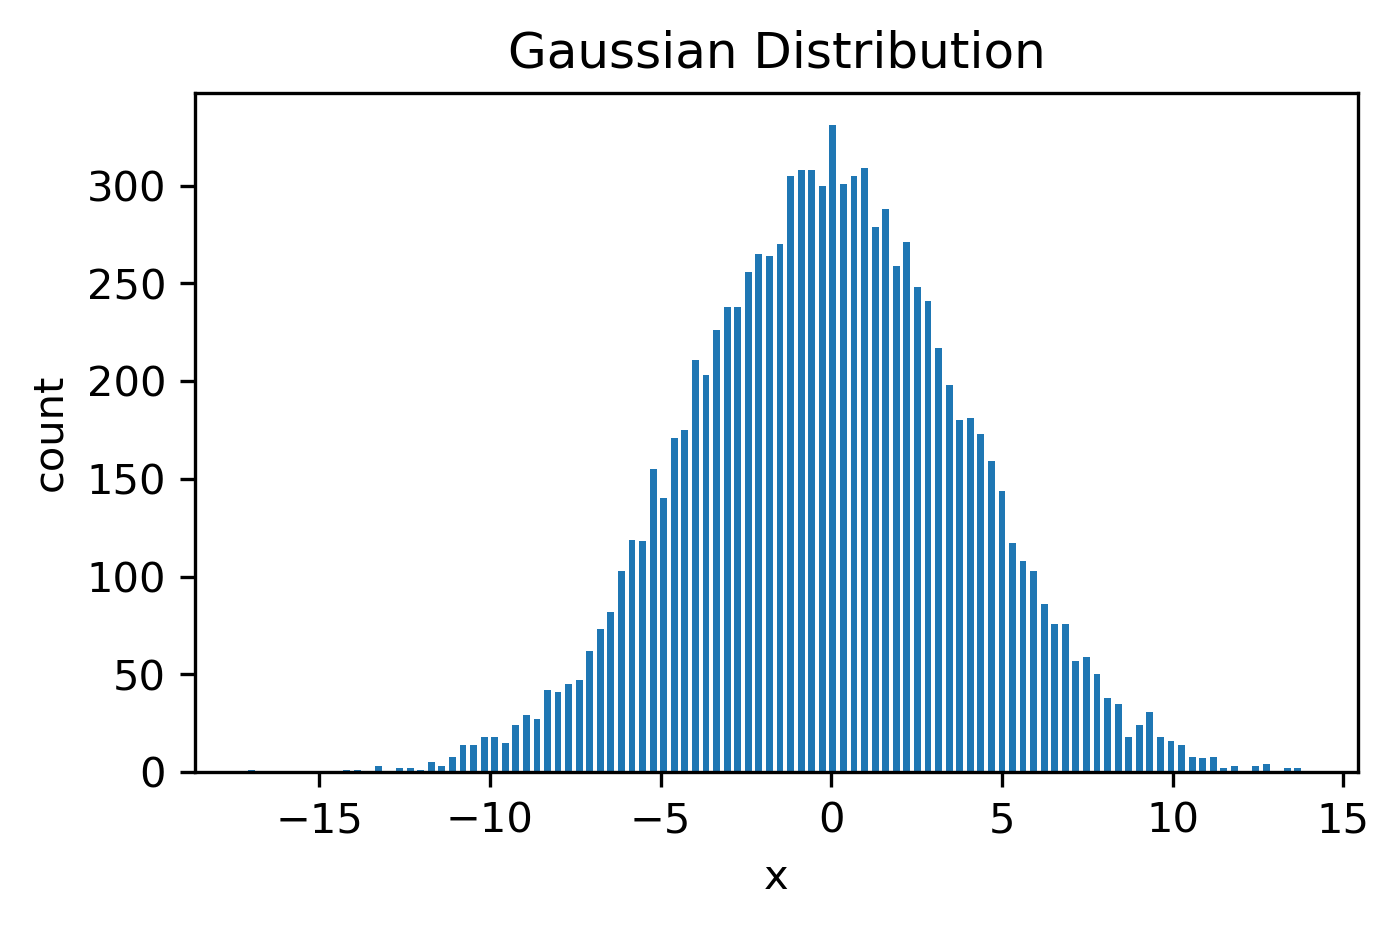

In [13]:
# 1. Sample N=10,000 data points from a Gaussian Distribution with parameters  𝜇=0  and  𝜎=4 ,
# using the np.random.standard_normal() function. Store your data in a numpy array 𝑋 .
N = 10000
mu = 0
sigma = 4
X = np.random.standard_normal(N) * sigma + mu

# 2. Create a figure.
#    - Plot the distribution of the data in 𝑋 .
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
ax.hist(X, bins=100, width=0.2)
ax.set_xlabel('x')
ax.set_ylabel('count')
ax.set_title('Gaussian Distribution')


Text(0.5, 1.0, 'Gaussian Distribution')

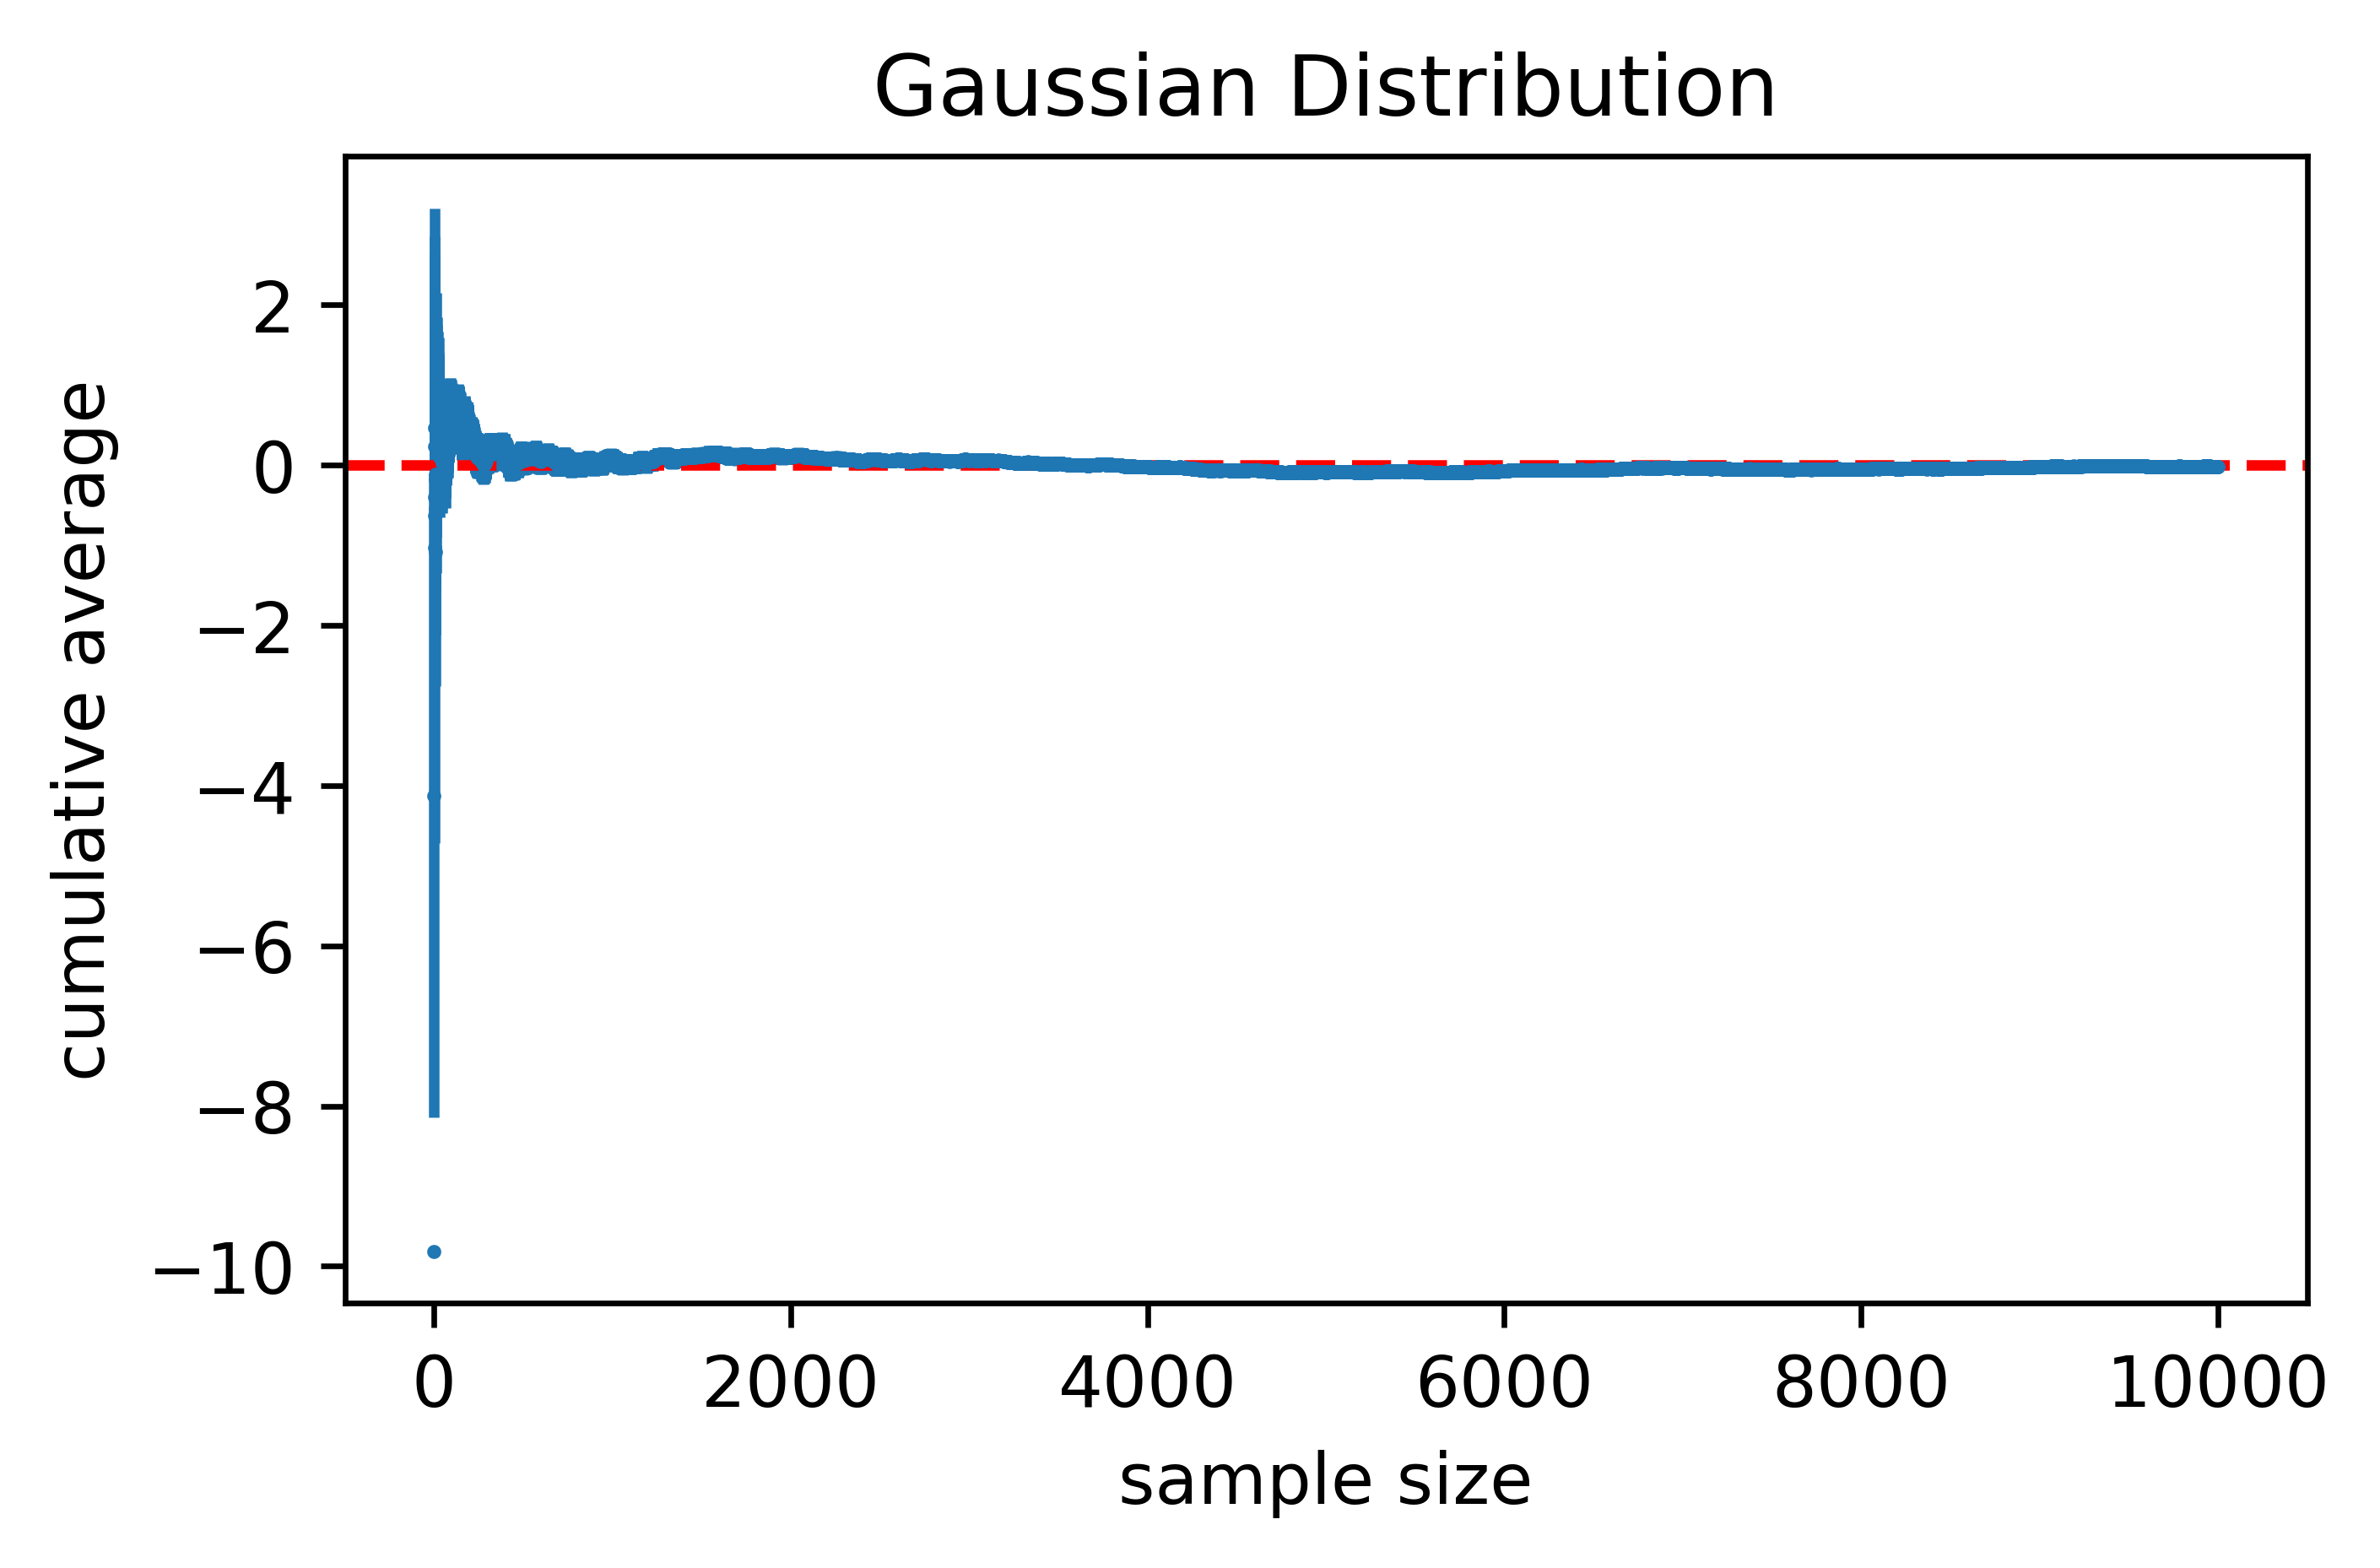

In [15]:
# 3. Compute the cumulative average of 𝑋 (you achieve this by computing average({𝑋[0],..., 𝑋[i-1]}) for each index i in [1, ..., N+1] ).
# Store the result in an array.
cumulative_average = np.cumsum(X) / np.arange(1, N + 1)

# 4. In a similar way, compute the cumulative standard error of 𝑋 .
#    Note: the standard error of a sample is defined as  𝜎𝑀=𝜎𝑛 , where 𝜎 is the sample standard deviation and 𝑛 is the sample size.
#    Store the result in an array.
cumulative_std = np.cumsum(X ** 2) / np.arange(1, N + 1) - cumulative_average ** 2
cumulative_std = np.sqrt(cumulative_std)
cumulative_std_error = cumulative_std / np.sqrt(np.arange(1, N + 1))

# 5. Compute the values of the distribution mean and median using the formulas you can find on the Wikipedia page of the Gaussian Distribution
mean = mu
median = mu

# 6. Create a figure.
#    - Plot the cumulative average computed in point 3. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
#    - Add errorbars to each point in the graph with width equal to the standard error of the mean (the one you computed in point 4).
#    - Add a horizontal line corresponding to the distribution mean (the one you found in point 5).
fig, ax = plt.subplots(figsize=(5, 3), dpi=600)
ax.errorbar(np.arange(1, N + 1), cumulative_average, yerr=cumulative_std_error, fmt='o', markersize=1)
ax.axhline(mean, color='r', linestyle='--')
ax.set_xlabel('sample size')
ax.set_ylabel('cumulative average')
ax.set_title('Gaussian Distribution')

Text(0.5, 1.0, 'Gaussian Distribution')

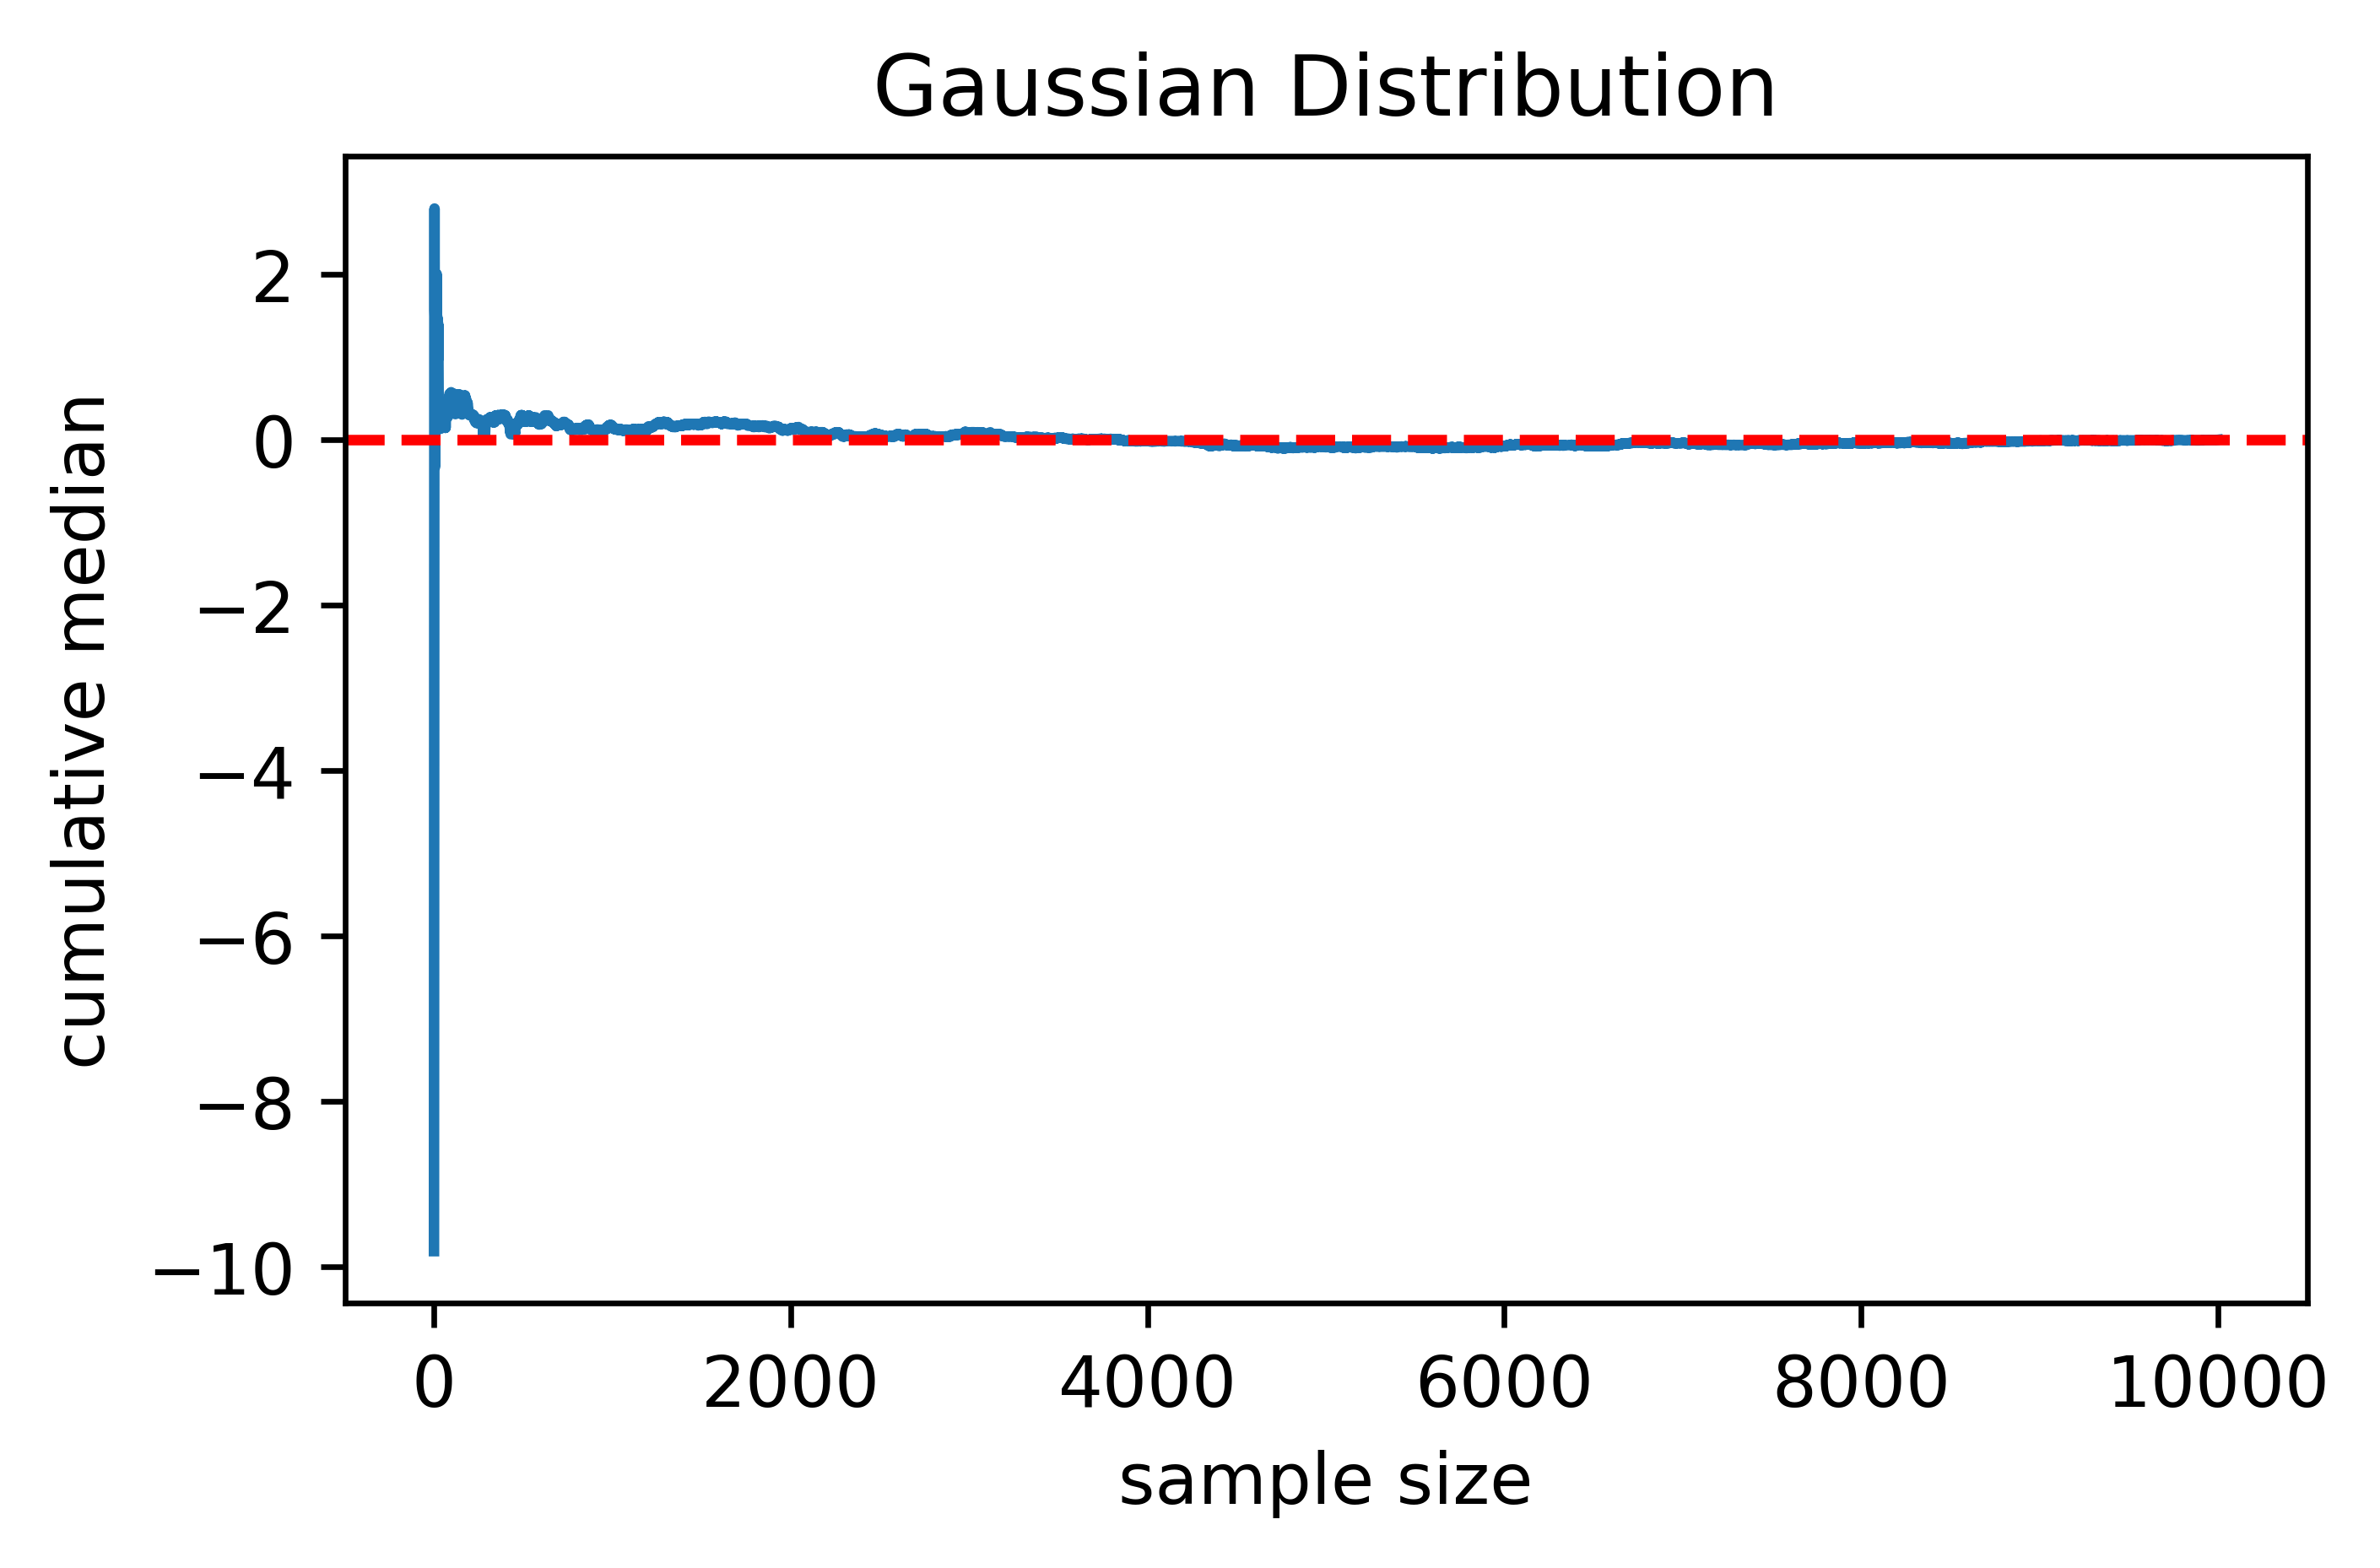

In [16]:
# 7. Compute the cumulative median of 𝑋 (you achieve this by computing median({𝑋[0],..., 𝑋[i-1]}) for each index i in [1, ..., N+1] ).
# Store the result in an array.
cumulative_median = np.zeros(N)
for i in range(N):
    cumulative_median[i] = np.median(X[:i + 1])

# 8. Create a figure.
#    - Plot the cumulative median computed in point 7. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
#    - Add a horizontal line corresponding to the distribution median (the one you found in point 5).
#    - _Optional:_ Add errorbars to your median line graph, with width equal to the standard error of the median. You can compute the standard error of the median via bootstrapping.
fig, ax = plt.subplots(figsize=(5, 3), dpi=600)
ax.plot(np.arange(1, N + 1), cumulative_median)
ax.axhline(median, color='r', linestyle='--')
ax.set_xlabel('sample size')
ax.set_ylabel('cumulative median')
ax.set_title('Gaussian Distribution')


Text(0.5, 1.0, 'Pareto Distribution')

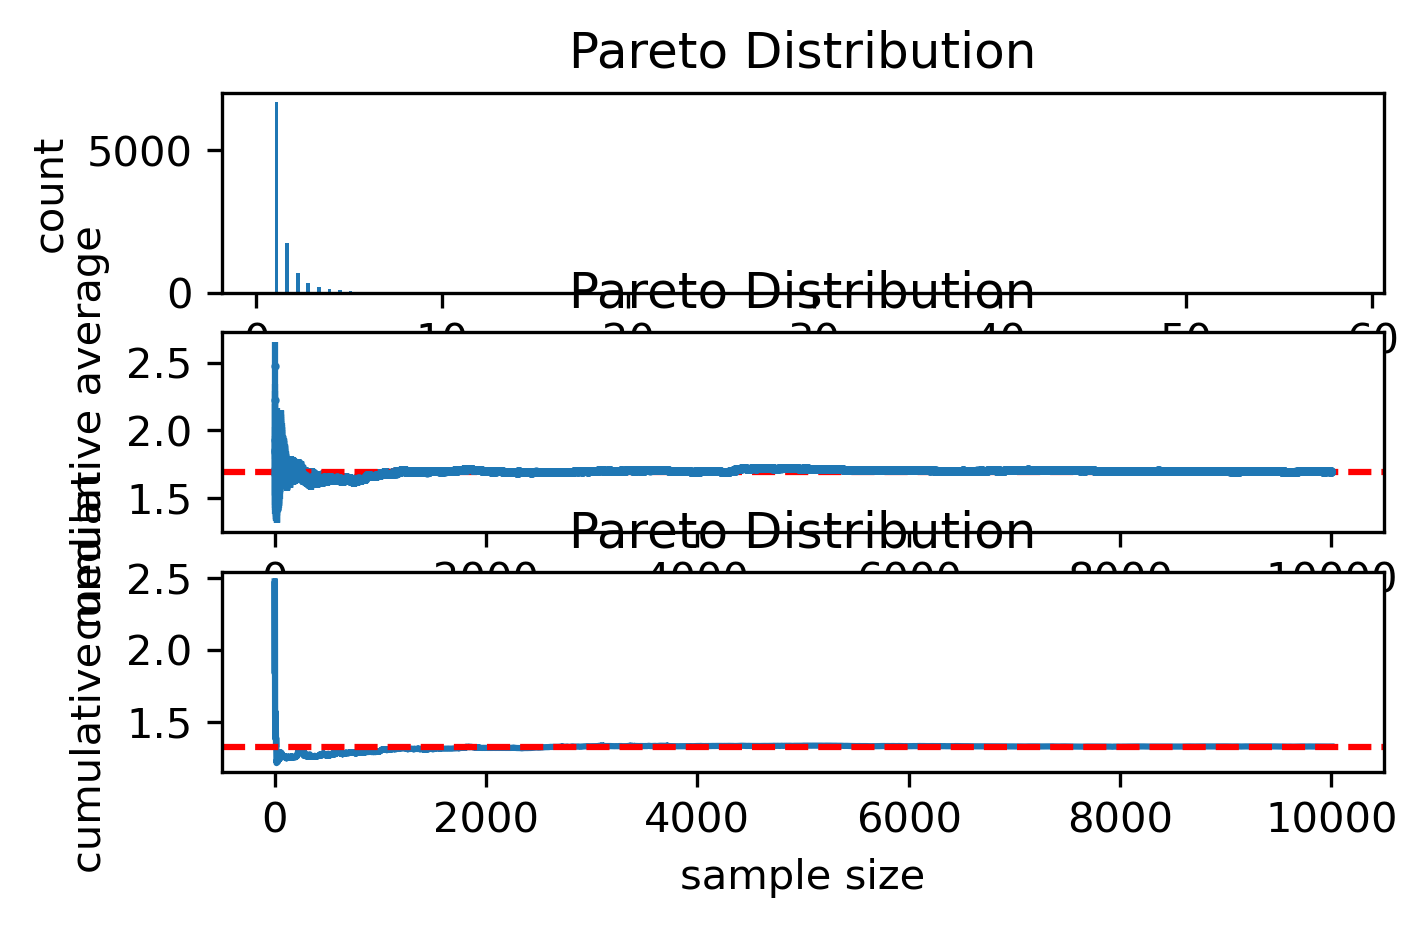

In [21]:
# 9. Now sample N=10,000 data points from a Pareto Distribution with parameters 𝑥𝑚=1 and 𝛼=2.5, using the np.random.pareto() function, and store it in a numpy array.
alpha = 2.5
xm = 1
X = np.random.pareto(alpha, N) + xm

# 10. Repeat points 2 to 8 for the Pareto Distribution sample computed in point 9.
# collect them in a 1x3 grid of subplots.
fig, axs = plt.subplots(3, 1, figsize=(5, 3), dpi=300)
axs = axs.flatten()

# plot distribution
axs[0].hist(X, bins=100, width=0.2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('count')
axs[0].set_title('Pareto Distribution')

# cumulative average
cumulative_average = np.cumsum(X) / np.arange(1, N + 1)
cumulative_std = np.cumsum(X ** 2) / np.arange(1, N + 1) - cumulative_average ** 2
cumulative_std = np.sqrt(cumulative_std)
cumulative_std_error = cumulative_std / np.sqrt(np.arange(1, N + 1))

axs[1].errorbar(np.arange(1, N + 1), cumulative_average, yerr=cumulative_std_error, fmt='o', markersize=1)
axs[1].axhline(np.mean(X), color='r', linestyle='--')
axs[1].set_xlabel('sample size')
axs[1].set_ylabel('cumulative average')
axs[1].set_title('Pareto Distribution')

# cumulative median
cumulative_median = np.zeros(N)
for i in range(N):
    cumulative_median[i] = np.median(X[:i + 1])

axs[2].plot(np.arange(1, N + 1), cumulative_median)
axs[2].axhline(np.median(X), color='r', linestyle='--')
axs[2].set_xlabel('sample size')
axs[2].set_ylabel('cumulative median')
axs[2].set_title('Pareto Distribution')



